In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [17]:
DATA_URL = "https://d2fefpcigoriu7.cloudfront.net/datasets/rugged_data.csv"
data = pd.read_csv(DATA_URL, encoding="ISO-8859-1")
df = data[["cont_africa", "rugged", "rgdppc_2000"]]
df = df[np.isfinite(df.rgdppc_2000)]
df["rgdppc_2000"] = np.log(df["rgdppc_2000"])
df.head()

,cont_africa,rugged,rgdppc_2000
2,1,0.858,7.492609
4,0,3.427,8.216929
7,0,0.769,9.933263
8,0,0.775,9.407032
9,0,2.688,7.792343


[Text(0, 0.5, 'log GDP (2000)'),
 Text(0.5, 0, 'Terrain Ruggedness Index'),
 Text(0.5, 1.0, 'African Nations')]

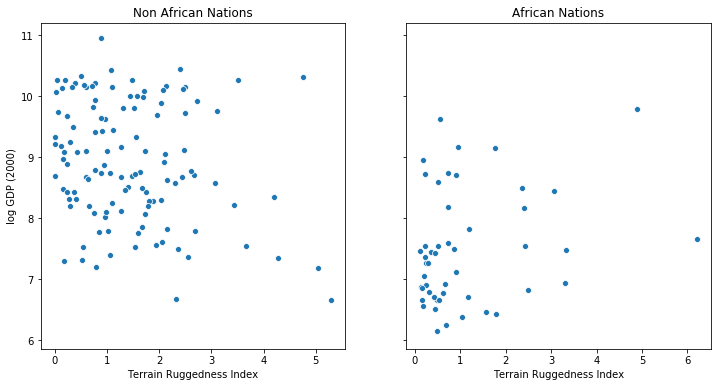

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
african_nations = data[data["cont_africa"] == 1]
non_african_nations = data[data["cont_africa"] == 0]
sns.scatterplot(non_african_nations["rugged"],
            np.log(non_african_nations["rgdppc_2000"]),
            ax=ax[0])
ax[0].set(xlabel="Terrain Ruggedness Index",
          ylabel="log GDP (2000)",
          title="Non African Nations")
sns.scatterplot(african_nations["rugged"],
            np.log(african_nations["rgdppc_2000"]),
            ax=ax[1])
ax[1].set(xlabel="Terrain Ruggedness Index",
          ylabel="log GDP (2000)",
          title="African Nations")

In [44]:
class RegressionModel(nn.Module):
    def __init__(self, p):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=p, out_features=1)
        self.factor = nn.Parameter(torch.tensor(data=1.))
        
    def forward(self, x):
        return self.linear(x) + (self.factor * x[:, 0] * x[:, 1]).unsqueeze(dim=1)

In [45]:
p=2
reg_model = RegressionModel(p=p)

In [46]:
loss_fn = torch.nn.MSELoss(reduction="sum")
optim = torch.optim.Adam(params=reg_model.parameters(), lr=0.05)
num_iterations = 5000
data = torch.tensor(data = df.values, dtype=torch.float)
x_data, y_data = data[:, :-1], data[:, -1]

In [47]:
def main(x_data, y_data, num_iterations):
    for i in range(num_iterations):
        y_pred = reg_model(x_data).squeeze(-1)
        loss = loss_fn(y_pred, y_data)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if (i + 1) % 50 == 0:
            print("[iteration %04d] loss: %.4f" % (i + 1, loss.item()))
            
    print("\nLearned parameters:")
    for name, param in reg_model.named_parameters():
        print(name, param.data.numpy())
        


In [48]:
main(x_data, y_data, num_iterations)

[iteration 0050] loss: 3896.4810
[iteration 0100] loss: 2003.0917
[iteration 0150] loss: 1396.6758
[iteration 0200] loss: 1046.8179
[iteration 0250] loss: 788.7859
[iteration 0300] loss: 590.2484
[iteration 0350] loss: 442.3182
[iteration 0400] loss: 336.9018
[iteration 0450] loss: 264.9783
[iteration 0500] loss: 217.9030
[iteration 0550] loss: 188.3036
[iteration 0600] loss: 170.4082
[iteration 0650] loss: 159.9994
[iteration 0700] loss: 154.1724
[iteration 0750] loss: 151.0324
[iteration 0800] loss: 149.4035
[iteration 0850] loss: 148.5903
[iteration 0900] loss: 148.1995
[iteration 0950] loss: 148.0189
[iteration 1000] loss: 147.9386
[iteration 1050] loss: 147.9044
[iteration 1100] loss: 147.8903
[iteration 1150] loss: 147.8848
[iteration 1200] loss: 147.8827
[iteration 1250] loss: 147.8819
[iteration 1300] loss: 147.8817
[iteration 1350] loss: 147.8816
[iteration 1400] loss: 147.8815
[iteration 1450] loss: 147.8815
[iteration 1500] loss: 147.8815
[iteration 1550] loss: 147.8815
[ite